<a href="https://colab.research.google.com/github/AdamChwila/bootcamp/blob/master/Adam_Chwila_bootcamp_project_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="font-size:2.0em;color:black;text-align:justify;line-height:1.8;">Prediction of the yearly actual suicide mortality rates in different countries</p>
<p style="font-size:0.9em;color:black;text-align:justify;line-height:1.8;">Data Science complete exemplary project<br>Adam Chwila</p>

<p style="font-size:2.0em;color:black;text-align:justify;line-height:1.8;">Introduction</p>
<p style="font-size:1.2em;color:black;text-align:justify;line-height:1.8;">The state of mental health and high number of suicides in many developed countries is an important issue, that is addressed by governments, organisations and scientists from around the world. According to WHO: "Measuring how many people die each year and why they died is one of the most important means – along with gauging how diseases and injuries are affecting people  – for assessing the effectiveness of a country’s health system". It refers also to the mental ilness such as depression, that can lead to suicide attempts.  The aim of the following project to find a method (with a machine learning approach) that allows to accurately predict suicide mortality rate in a given country, in a given year. Formally, the dependent variable is defined as a crude suicide rate (per 100 000 population). It means that for a given year and for a given country the total number of suicide deaths is divided by a mid-year total population of the given country and then multiplied by 100 000. For example if in a given year a total number of suicides in a given country is equal to 10 000 and the total mid-year population of this country is equal to 40 mln people, then the crude suicide rate (per 100 000 population) is equal to 25. </p>

<p style="font-size:2.0em;color:black;text-align:justify;line-height:1.8;">Raw data: collection and description</p>
<p style="font-size:1.2em;color:black;text-align:justify;line-height:1.8;">The longitudinal data applied during the modelling process is collected from the 2 sources: WHO databases and World Bank databases. The data consist 160 records of 7 variables:<br>&#9635; <b>year</b>: from 1979 to 2019 for most countries (for Poland from 1983).<br>&#9635; <b>country</b>: one of the 4 countries such as Australia, France, Italy, Poland.<br>&#9635; <b>HDI</b>: Human Development Index (the quantitative measure of life quality, the number in range [0,1], higher number indicate higher quality of life). Data from 1990 to 2018 year. World Bank data.<br> &#9635; <b>unemployment_rate</b>:  unemployment refers to the share of the labor force that is without work but available for and seeking employment. Data originally from International Labour Organisation. Data from 1991 to 2019. World Bank data.<br>&#9635; <b>GDP_per_capita</b>: gross domestic product divided by midyear population. Data are in current U.S. dollars (latest update 01.07.2020). Data from 1979 to 2019. World bank data.<br>&#9635; <b>suicide_rate</b>: official data collected from officail statistics of each country (cause of death: intentional self-harm). Data from 1979 to 2016. WHO data.<br>&#9635; <b>estimated_suicide_rate</b>: The WHO estimation of the actual suicide rates for years: 2000, 2005, 2010, 2015, 2016. WHO data.<br> *The reason of shortening of the time horizon for Poland is connected to the earliest available official data for variable suicide_rate (1983 year). </p>

<p style="font-size:2.0em;color:black;text-align:justify;line-height:1.8;">Suicide rates: official data vs estimates</p>
<p style="font-size:1.2em;color:black;text-align:justify;line-height:1.8;">The goal of the project is to predict as accurately as possible actual suicide rates in a given country. However there is an issue connected to the official statictics of the suicide data (variable suicide rate): it is usually underestimated. Accordingly to the WHO official statement: "This problem of poor-quality mortality data is not unique to suicide, but given the sensitivity of suicide – and the illegality of suicidal behaviour in some countries – it is likely that under-reporting and misclassification are greater problems for suicide than for most other causes of death. Suicide registration is a complicated, multilevel procedure that includes medical and legal concerns and involves several responsible authorities that can vary from country to country". Moreover it is not always clear if the cause of death (i.e. drug overdose) was a suicide or an unintentional accident. Because of the above reasons WHO prepares and estimates the actual suicide rates, which are mostly based on the official statistics, but also involve estimation of suicides that were not officially reported. The WHO comment regarding the estimation of the suicide rates is as follow: "These estimates represent the best estimates of WHO, computed using standard categories, definitions and methods to ensure cross-country comparability, and may not be the same as official national estimates". However the WHO estimates are avialable only for years 2000, 2005, 2010, 2015 and 2016 which causes problem of extremely low number of data to build a predictive, complex machine learning model. Nevertheless because the WHO estimates of suicide data are higly correlated with the suicide_rate, there is a possibility of aplication of simple machine learning method (such as linear regression) in order to estimate the actual suicide rates for the missing years, based on the official statistics. Then, the variable estimated suicide rate can be used as explained variable during the modelling process. The author hopes that this approach allows to obtain more accurate predictions of the actual suicide rates for years 2017-2018, than in case if the explained variable would be raw, official underestimated data.</p>

<p style="font-size:2.0em;color:black;text-align:justify;line-height:1.8;">The flow of data preparation</p>
<p style="font-size:1.2em;color:black;text-align:justify;line-height:1.8;">The suicide official and estimated data is available up to 2016 year. Therefore the aim of the project is to estimate a models in order to predict the actual suicide rates for years 2017, 2018. <br><br>The missing values of explanatory variables (HDI, unemployment rate, GDP per capita) are going to be refilled as follows:<br>1. The lack of data for the whole beginnig period (for most countries the data for years 1979-1989 for HDI, 1979-1990 for unemployment_rate and years prior to 1990 for Poland in case of GDP per capita) is going to be refilled with the time-series forecasting based on the reversed order of the data (the most recent data is going to be treated as the first instance of a time-series and the oldest available data is going to be treated as last instace of a time-series). The estimation of missing beggining period of explanatory variables is going to be based only on the reversed history of a gien variable (the data will be eventually applied in order to estimate suicide rates, therefore the author want to avoid modelling of missing data with additional variables that will be also used during the final modelling process of suicide rates. Such decision is made in order to avoid of creation of potentially unintended dependencies between variables from the beginning period of the data).<br><br>The missing values of variables: suicide rate and estimated_suicide_rate are going to be refilled with the following steps:<br>1. The data missing data of suicide rate is going to be linearly interpolated based on the values of the neighbour years with the following exception: the missing values for years 2000, 2005, 2010, 2015 and 2016 are not going to be refilled, because for that years all the data of estimated suicide rate are available. The author chooses to make a linaer model (while making an estimation of missing years of estimated suicide rate with suicide rate as explanatory variable) based on less data, because the potential interpolations in this case would be 1/5 or 2/5 of the data based on which the linear regression is applied. Therefore the interpolation would be very influential on the final state of the estimated suicide rate.<br>2. The missing data for estimated suicide rate is going to be refilled based on the results of simple linear regression model, as mentioned earlier. </p>

<p style="font-size:2.0em;color:black;text-align:justify;line-height:1.8;">Imports of all needed packages</p> 

In [1]:
# Installation of the needed packages on the local machine
# pip install sklearn
# pip install pandas
# pip install numpy
# pip install keras

In [2]:
import pandas as pd
import numpy as np

from sklearn import linear_model
from sklearn import  metrics
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

import math 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Bidirectional
from keras.regularizers import L1L2
from keras.callbacks import EarlyStopping

import random

%matplotlib inline

<p style="font-size:2.0em;color:black;text-align:justify;line-height:1.8;">Loading of raw data </p> 

In [3]:
raw_data=pd.read_csv('https://raw.githubusercontent.com/AdamChwila/bootcamp/master/suicide_rates_bootcamp_data.csv',sep=';',decimal=',')

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    160 non-null    int64  
 1   country                 160 non-null    object 
 2   suicide_rate            140 non-null    float64
 3   HDI                     116 non-null    float64
 4   unemployment_rate       116 non-null    float64
 5   estimated_suicide_rate  20 non-null     float64
 6   GDP_per_capita          153 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 8.9+ KB


<p style="font-size:2.0em;color:black;text-align:justify;line-height:1.8;">Data preparation</p> 

<p style="font-size:1.2em;color:black;text-align:justify;line-height:1.8;"> Checking the Pearson correlation between variable suicide rate and estimated suicide rate for each country. We take into account only the years 2000, 2005, 2010, 2015 and 2016. If the value for suicide rate is missing, the record is not taken into account.</p>

In [5]:
lin_reg_data=raw_data[raw_data['year'].isin([2000,2005,2010,2015,2016]) & ~raw_data['suicide_rate'].isin(['NaN'])] 

<p style="font-size:1.2em;color:black;text-align:justify;line-height:1.8;">Pearson correlation between suicide_rate and estimated_suicide_rate</p>

In [6]:
correlations=lin_reg_data[['suicide_rate','country']].groupby('country').corrwith(lin_reg_data.estimated_suicide_rate).rename(columns={'suicide_rate':'Pearson corr'})
correlations

,Pearson corr
country,
Australia,0.864825
France,0.993659
Italy,0.221430
Poland,0.832766


<p style="font-size:1.2em;color:black;text-align:justify;line-height:1.8;"> Based on the above results it was decided to drop Italy from the scope of the modelling and analysis. Unfortunately very weak linear dependency between official suicide data and WHO estimates makes it impossible, in the end, to get the accurate actual suicide rate predictions for Italy accordingly to the author's concept. Moreover any combined approach with the data from Italy (where models are built based on input from several countries) would potentially affect the overall results for other countries predictions. The results for other countries (correlation coefficient above 0,8) are found to be sufficient for the further modelling process attempt. </p>

<p style="font-size:2.0em;color:black;text-align:justify;line-height:1.8;">Dropping Italy from the considered data frames</p>  

In [7]:
raw_data=raw_data[raw_data['country']!='Italy']
lin_reg_data=lin_reg_data[lin_reg_data['country']!='Italy']

<p style="font-size:1.2em;color:black;text-align:justify;line-height:1.8;"> Estimating linear models in order to refill the estimated_suicide_rate based on the suicide_rate variable separately for each country</p>

In [8]:
lin_model=[]

# below the list of countries in order in which they appear in the data
countries=lin_reg_data.country.unique()

# loop with linear models estimation: in the end each model is added to the list
for country in countries:
    
    # transformations of data frame data
    x=np.vstack(lin_reg_data[lin_reg_data.country==country].suicide_rate)
    y=np.vstack(lin_reg_data[lin_reg_data.country==country].estimated_suicide_rate)
    
    model = linear_model.LinearRegression()
    model.fit(x, y)
    lin_model.append(model)
    
    # MAE
    print("Mean absolute error: {}".format(metrics.mean_absolute_error(y, model.predict(x)).round(3)),"for training data for",country)

Mean absolute error: 0.223 for training data for Australia
Mean absolute error: 0.091 for training data for France
Mean absolute error: 0.438 for training data for Poland


<p style="font-size:1.2em;color:black;text-align:justify;line-height:1.8;">The mean absolute errors are quite low (at least in comparison to difference between variables: suicide rate and estimated suicide rate i.e. for Australia the average difference between suicide rate and suicide WHO estimates is equal to 2,13). It should be noted that mean absolute errors are computed only for training data. Because of small data sets it is impossible to divide the data sets into train and test part and at the same time get accurate estimates. Mean absolute error tells about the average difference between the linearly modelled and observed (estimated by WHO) estimated suicide rate.</p>

<p style="font-size:1.2em;color:black;text-align:justify;line-height:1.8;">Getting rid of the years 2017, 2018 and 2019 - models are going to be estimated based on the data up to year 2016 (last year of available suicide data)</p>

In [9]:
raw_data2=raw_data[raw_data.year<=2016]

<p style="font-size:1.2em;color:black;text-align:justify;line-height:1.8;"> Refilling missing values in case of suicide rate before application of estimated linear models</p>

In [10]:
countries=lin_reg_data.country.unique()

# the years 2000,2005,2010,2015,2016 are excluded from interpolation, because for these years the WHO estimates are available
for country in countries:
    raw_data2.loc[(raw_data2.country==country) & ~raw_data['year'].isin([2000,2005,2010,2015,2016]),'suicide_rate']=\
    raw_data2.loc[(raw_data2.country==country) & ~raw_data['year'].isin([2000,2005,2010,2015,2016]),'suicide_rate'].interpolate()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


<p style="font-size:1.2em;color:black;text-align:justify;line-height:1.8;"> Estimation of missing estimated_suicide_rate with linear models</p>

In [11]:
countries=lin_reg_data.country.unique()
for i in range(0,len(countries)):
    
    # preparation of data for linear model prediction
    suicide_rate_x=np.vstack(raw_data2[(raw_data2.country==countries[i]) & ~raw_data2['year'].isin([2000,2005,2010,2015,2016])].suicide_rate)
    
    # assigning the predictions to the actual data frame
    raw_data2.loc[((raw_data2.country==countries[i]) & ~raw_data2['year'].isin([2000,2005,2010,2015,2016])),'estimated_suicide_rate']=lin_model[i].predict(suicide_rate_x)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

<p style="font-size:2.0em;color:black;text-align:justify;line-height:1.8;">A few more words on the linear regression estimation of the actual suicide rates</p>
<p style="font-size:1.2em;color:black;text-align:justify;line-height:1.8;"> The selected approach (estimation with simple linear regression model separately for each country) is considered to be the most suitable because of the two reasons: the linear dependency between variables (based both on the grounds of expert opinion and statistical check) and small number of data, which excludes more sophisticated methods. Other possible methods of esimation could be: lasso regression, linear regression, linear mixed model (with country as random effect), linear model estimated for all countries together (with additional variables after one-hot-encoding of variable country). The lasso and ridge regression are excluded because in case of additional parameter more data would be needed in order to divide the data set into train and test parts, to estimate optimal penalty value. The estimation of all countries together was rejected due to the fact that the level of underestimation of official suicide rates data may be different in each country due to the reasons that can be hard to detect (connected i.e. to the technical process of collecting data, law, culture e.t.c).</p>

In [12]:
raw_data2

,year,country,suicide_rate,HDI,unemployment_rate,estimated_suicide_rate,GDP_per_capita
0,1979,Australia,11.6,NaN,NaN,13.464869,9281.523356
1,1980,Australia,10.9,NaN,NaN,13.096501,10194.318700
2,1981,Australia,11.1,NaN,NaN,13.201749,11833.743210
3,1982,Australia,11.3,NaN,NaN,13.306997,12766.522250
4,1983,Australia,10.7,NaN,NaN,12.991254,11518.668520
...,...,...,...,...,...,...,...
152,2012,Poland,13.8,0.836,10.088,17.776316,13145.539260
153,2013,Poland,13.5,0.851,10.326,17.460526,13781.062610
154,2014,Poland,13.0,0.853,8.990,16.934211,14347.914580
155,2015,Poland,11.9,0.858,7.501,15.800000,12572.426600


<p style="font-size:2em;color:black;text-align:justify;line-height:1.8;">The estimation of HDI, unemployment rate and GDP per capita for the beginning period of the analysed data: time series forecasting based on the reversed order of the data</p>

<p style="font-size:1.2em;color:black;text-align:justify;line-height:1.8;"> HDI estimation for years 1979-1989: lets see some plots of the HDI in period 1990-2018 for all the considered countries</p>

In [13]:
#preparation of the data 
HDI=raw_data.loc[(raw_data.year>1989) & (raw_data.year<2019),['year','country','HDI']]

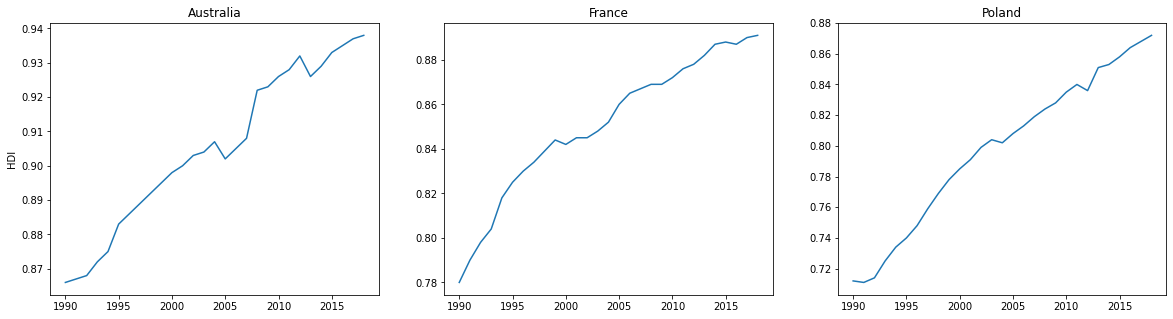

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
countries=HDI.country.unique()

for i in range(0,len(countries)):
    ax[i].plot(HDI.loc[HDI.country==countries[i],'year'],HDI.loc[HDI.country==countries[i],'HDI'])
    ax[i].set_title(countries[i])
ax[0].set_ylabel('HDI')
plt.show()

<p style="font-size:1.2em;color:black;text-align:justify;line-height:1.8;"> We can see that the time-series are quite similar to each other and that the tendency is the same for all the considered countries. Because of the similar tendencies, all the time series will be extended for missing years with the same modelling approach (but for each country model will be fitted separately).</p>

<p style="font-size:2em;color:black;text-align:justify;line-height:1.8;"> Lets extend the HDI time series with simple LSTM neural networks</p>

In [15]:
# function creating dataset with the chosen number of delays of time series (i.e. for look_back=2 the value in time t is explained by the model by values in times: t-1 and t-2)

# source of function: https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
# in case of the following project the function is slightly modified (see the explanation below)

def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

<p style="font-size:1.2em;color:black;text-align:justify;line-height:1.8;"> In the folloing project the following approach for train test split is chosen: the delays of certain variables (i.e. estimated suicide rate) shortens only the train set (by first x observations, where x is the oldest considered delay). In standard situation the test set would be also shortened (so the values of explained variable that are present in the train set are not present in the test set on the positions of explanatory variables). However due to very few time series histories (around 30 observations) it was decided not to shorten the test data set in order to improve quality and stability of the applied machine learning techniques. It was observed that the training process of the neural networks after application of the mentioned approach was much smoother and stable.

In [16]:
# data preparation function - preparation for the lstm implementation in Keras
def lstm_data_prepare(data=HDI,country_name='Australia',look_back=1,scaler_ind=1,variable='HDI'):
    dataset = data[data.country==country_name][variable].values

    # preparation for format needed for LSTM networks, also reversing order of the time series - we are going to estimate the history, assuming similar tenencies as the ones in the future
    dataset = np.vstack(np.flip(dataset.astype('float32')))

    # the data is split into training and testing set: ~70% of dataset for train and ~30% observatons for test
    train_size = int(len(dataset) * 0.7)
    test_size = len(dataset) - train_size
    
    train, test = dataset[0:train_size,:], dataset[train_size-look_back:len(dataset),:]
    
    # application of MinMax Scaler
    
    # two scalers considered: first for training the network (with train test split) and the second for application of the whole dataset and making actual predictions
    if scaler_ind==1:
        scaler=MinMaxScaler(feature_range=(0, 1))
        scaler2=MinMaxScaler(feature_range=(0, 1))
    
        train=scaler.fit_transform(train)
        test=scaler.transform(test)
    
        dataset=scaler2.fit_transform(dataset)
    else:
        scaler2=0
    
    # creation of training and testing datasets: note, that consideration of lookback greater by 1 shortens the time horizon of training dataset by 1 additional period
    trainX, trainY=create_dataset(train, look_back=look_back)
    testX, testY=create_dataset(test, look_back=look_back)
    all_x, all_y=create_dataset(dataset,look_back=look_back)
    
    # reshape input to be [samples, features, time steps]
    trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    all_x=np.reshape(all_x, (all_x.shape[0], 1, all_x.shape[1]))
    
    return [trainX, trainY, testX, testY, all_x, all_y, dataset, scaler2]

<p style="font-size:1.2em;color:black;text-align:justify;line-height:1.8;"> Creation of data for each country in a loop: output is list of different slices of data </p>

In [17]:
countries=HDI.country.unique()

# setting the look_back variable
look_back=3

data_list=[]
for country in countries:
    
    # for HDI scaler set to 0 (no scaler), because the values of time series are already in range [0,1] and they are quite close to each other
    data=lstm_data_prepare(country_name=country,look_back=look_back,scaler_ind=0)
    data_list.append(data) 

<p style="font-size:2em;color:black;text-align:justify;line-height:1.8;"> Simple LSTM neural network: function for training the network </p>
<p style="font-size:1.2em;color:black;text-align:justify;line-height:1.8;">&#9635; one LSTM layer, default activation function (tanh),<br>&#9635; small number of parameters in order to reduce time needed to compute all models for all countries, but the list could be easily extended, more parameters could be added,<br> &#9635; maximum number of epochs set to 3000,<br>&#9635; high value of patience in order to avoid random stopping of optimization process, that can cause underfitting (i.e. stopping after 10 epochs when patience=2)<br> &#9635; min epochs argument added to the function: it covers the situations when despite high patience network stops learning after a few iterations due to some random high improvements (issue caused by small data sets)</p>

In [18]:
def lstm_calibration(trainX,trainY,testX,testY,neurons=[15, 30],epochs_number=3000,patience=300,min_epochs=200, regular=0):
    results = []
    n_epochs=[]
    n_type=[]
    l2_type=[]

    for neuron in neurons:
            model = Sequential()
            model.add(LSTM(neuron,kernel_initializer='lecun_normal',kernel_regularizer=L1L2(l2=regular),input_shape=(1, look_back)))
            model.add(Dense(1))
            
            # rmsprop opitimzer chosen; i.e. for 'adam' the optimization process was very unstable (networked often stopped improving on validation set after less than 10 iterations)
            model.compile(loss='mean_squared_error', optimizer='rmsprop')
            
            #fitting of model assigned to the function in order to obtain history of learning process
            r=model.fit(trainX, trainY, epochs=epochs_number, batch_size=1, verbose=0,validation_data=(testX, testY),shuffle=False,\
                  callbacks=[EarlyStopping(monitor='val_loss', verbose=0, patience=patience, restore_best_weights=False)])
            results.append(min(r.history['val_loss']))
            
            if len(r.history['loss'])==epochs_number:
                n_epochs.append(len(r.history['loss']))
            # if the number of epochs is very low (despite high patience), the minimum number of epochs for training is set to min epochs number (to avoid underfitting)
            elif len(r.history['loss'])<patience+min_epochs:
                n_epochs.append(min_epochs)
            else:
                n_epochs.append(len(r.history['loss'])-patience)
                
            n_type.append(neuron)
            l2_type.append(regular)
            
    # function returns: optimal number of neurons in LSTM layer, optimal number of epochs for appropriate model, chosen values of L2 regularization
    # return [neurons[np.argmin(results)], n_epochs[np.argmin(results)],]
    return [n_type[np.argmin(results)], n_epochs[np.argmin(results)], l2_type[np.argmin(results)]]

# note:
# in order to choose the optimal value of regularization parameter, the additional procedure would be required, because val_loss is dependent on the regularization value
# the higher the regularization parameter, the higher val_loss - val_loss of models with different regularization parameters incomparable


<p style="font-size:1.2em;color:black;text-align:justify;line-height:1.8;"> Calibration of neural networks for HDI time series. Because the HDI time series are quite stable, no regularization parameters are considered</p>

In [19]:
countries=HDI.country.unique()
best_models=[]

# random seed set for all cases when the neural networks are considered in order to maintain reproductability of the results
random.seed(30)

for i in range(0,len(countries)):
    
    # best found parameters of LSTM models: number of neurons in LSTM layer, optimal number of epochs, optimal regularization L2 parameter
    model_lstm_hdi=lstm_calibration(data_list[i][0],data_list[i][1],data_list[i][2],data_list[i][3])
    
    best_models.append(model_lstm_hdi)

<p style="font-size:1.2em;color:black;text-align:justify;line-height:1.8;">Function: retraining the best networks for each country on the whole dataset with the given number of epochs and neurons</p>

In [20]:
 def final_lstm(all_x,all_y, neurons, epochs, reg):    
    model = Sequential()
    model.add(LSTM(neurons,kernel_regularizer=L1L2(l2=reg),input_shape=(1, look_back)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='rmsprop')
    model.fit(all_x, all_y, epochs=epochs, batch_size=1, verbose=0,shuffle=False)
    return model

<p style="font-size:1.2em;color:black;text-align:justify;line-height:1.8;"> Retraining of the best networks for HDI</p>

In [21]:
# list of estimated LSTM models for each country
countries=HDI.country.unique()
best_model_calibration=[]

# setting random seed to maintain reproductability of the results
random.seed(30)

for i in range(0,len(countries)):
    best_model_calib=final_lstm(data_list[i][4],data_list[i][5],best_models[i][0],best_models[i][1],best_models[i][2])
    best_model_calibration.append(best_model_calib)

<p style="font-size:1.2em;color:black;text-align:justify;line-height:1.8;">Function: making estimations of the reversed time-series for given variable (HDI, unemployment rate or GDP).</p>

In [22]:
def predictions_lstm(data,model_lstm,country,scaler,look_back=3,year=1990):
    data_frag=data[-look_back:]
    
    # how many years are missing in the time-series
    nr_pred=year-raw_data2.loc[(raw_data2.country==country),'year'].min()
 
    for i in range(0,nr_pred):
        reshaped=np.reshape(data_frag[-look_back:],(1,1,look_back))

        prediction=model_lstm.predict(reshaped)
        data_frag=np.concatenate((data_frag,prediction))
        
    # the differentiation if the data is scaled or not
    if scaler==0:
        w1=data_frag[-nr_pred:]
    else:
        w1=scaler.inverse_transform(data_frag[-nr_pred:])
        
    return w1

<p style="font-size:1.2em;color:black;text-align:justify;line-height:1.8;">Adding HDI predictions to the data frame with all data</p>

In [23]:
# Refilling HDI variable with predictions of LSTM models

for i in range(0,len(countries)):
    wyniki=predictions_lstm(data_list[i][6],best_model_calibration[i],countries[i],scaler=data_list[i][7],look_back=look_back)
    
    # below flip(wyniki), because we were predicting backwards, so in the end the predictions need to be switched back
    raw_data2.loc[(raw_data2.country==countries[i]) & (raw_data2.year<1990),'HDI']=np.flip(wyniki)
    
# note
# for Poland history is extended to 1983 (earliest available history of considered data)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

<p style="font-size:1.2em;color:black;text-align:justify;line-height:1.8;"> Plots of HDI with extended history</p>

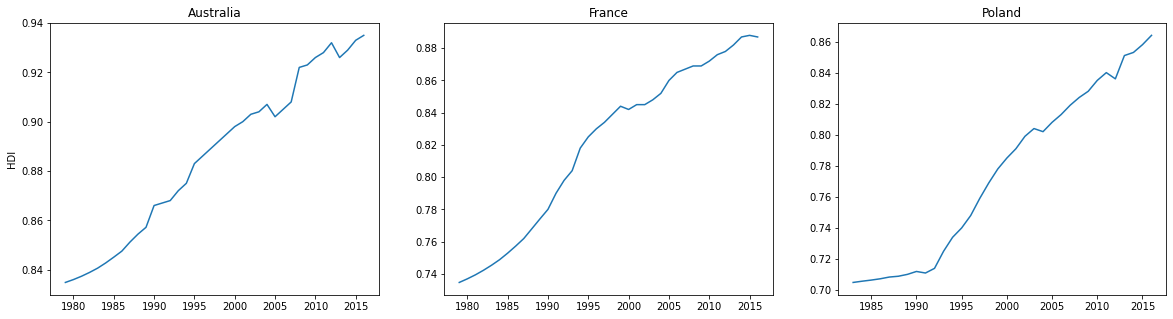

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
countries=raw_data2.country.unique()

for i in range(0,len(countries)):
    ax[i].plot(raw_data2.loc[raw_data2.country==countries[i],'year'],raw_data2.loc[raw_data2.country==countries[i],'HDI'])
    ax[i].set_title(countries[i])
ax[0].set_ylabel('HDI')
plt.show()

<p style="font-size:2em;color:black;text-align:justify;line-height:1.8;"> Unemployment rate estimation for years 1979-1990</p>

<p style="font-size:1.2em;color:black;text-align:justify;line-height:1.8;">Plots of HDI with extended history Lets see some plots of the unemployment rate in period 1990-2018 for all considered countries</p>

In [25]:
#preparation of the data for unemployment rate analysis and estimation
UR=raw_data.loc[(raw_data.year>1990),['year','country','unemployment_rate']]

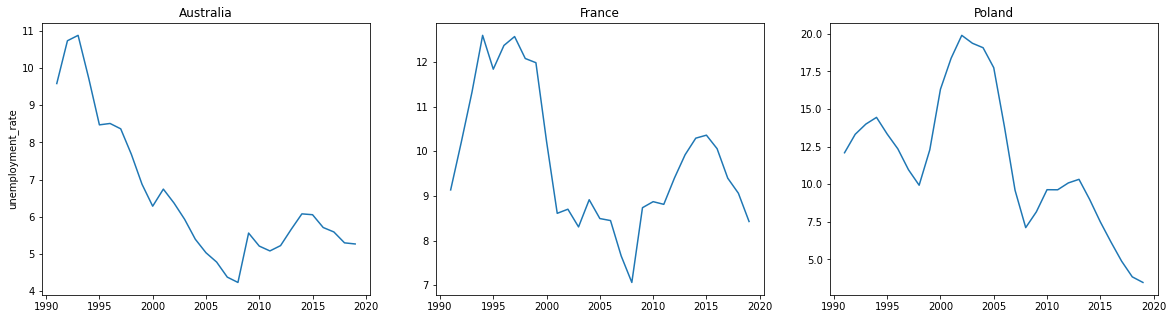

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
countries=UR.country.unique()

for i in range(0,len(countries)):
    ax[i].plot(UR.loc[UR.country==countries[i],'year'],UR.loc[UR.country==countries[i],'unemployment_rate'])
    ax[i].set_title(countries[i])
ax[0].set_ylabel('unemployment_rate')
plt.show()

<p style="font-size:1.2em;color:black;text-align:justify;line-height:1.8;"> Based on the above plots it is quite clear that estimation of unemployment rates for years earlier than 1990 will be quite challenging</p>

<p style="font-size:1.2em;color:black;text-align:justify;line-height:1.8;">Creation of data set for unemployemnt rate</p>

In [27]:
# Creation of dataset for each country i a loop: output is list of different slices of data
countries=UR.country.unique()

# setting the look_back variable
look_back=3
data_list_UR=[]

for country in countries:  
    data=lstm_data_prepare(data=UR,country_name=country,look_back=look_back,scaler_ind=1,variable='unemployment_rate')
    data_list_UR.append(data) 

<p style="font-size:1.2em;color:black;text-align:justify;line-height:1.8;"> Training of neural networks</p>

In [28]:
countries=UR.country.unique()
best_models_UR=[]
random.seed(30)
for i in range(0,len(countries)):
    
    # the regularization parameter is set up because of unemployment rate time-series instability
    model_lstm_ur=lstm_calibration(data_list_UR[i][0],data_list_UR[i][1],data_list_UR[i][2],data_list[i][3],neurons=[10, 20],patience=30, min_epochs=20,regular=0.002)
    best_models_UR.append(model_lstm_ur)

<p style="font-size:1.2em;color:black;text-align:justify;line-height:1.8;"> Retraining the network on the whole dataset with the given number of epochs and neurons</p>

In [29]:
# list of estimated LSTM models for each country
countries=UR.country.unique()
random.seed(30)
best_model_calibration_UR=[]
for i in range(0,len(countries)):
    best_model_calib=final_lstm(data_list_UR[i][4],data_list_UR[i][5],best_models_UR[i][0],best_models_UR[i][1],best_models_UR[i][2])
    best_model_calibration_UR.append(best_model_calib)

<p style="font-size:1.2em;color:black;text-align:justify;line-height:1.8;"> Making prediction of unemployment rate: adding unemployment rate predictions to the data frame with all data</p>

In [30]:
# Refilling unemployment rate variable with predictions of LSTM models
countries=UR.country.unique()

for i in range(0,len(countries)):
    wyniki=predictions_lstm(data_list_UR[i][6],best_model_calibration_UR[i],countries[i],scaler=data_list_UR[i][7],look_back=look_back,year=1991)
    # below flip(wyniki), because we were predicting backwards, so in the end the predictions need to be switched back
    raw_data2.loc[(raw_data2.country==countries[i]) & (raw_data2.year<1991),'unemployment_rate']=np.flip(wyniki)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

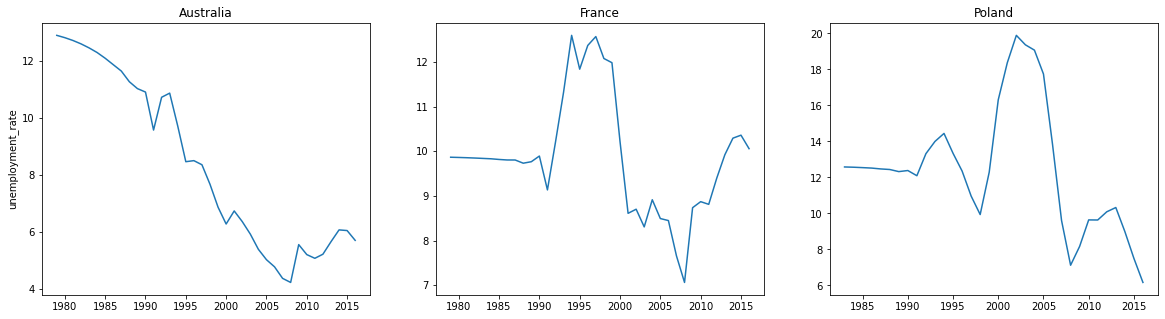

In [31]:
# plots of HDI with extended history
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
countries=raw_data2.country.unique()

for i in range(0,len(countries)):
    ax[i].plot(raw_data2.loc[raw_data2.country==countries[i],'year'],raw_data2.loc[raw_data2.country==countries[i],'unemployment_rate'])
    ax[i].set_title(countries[i])
ax[0].set_ylabel('unemployment_rate')
plt.show()

<p style="font-size:2em;color:black;text-align:justify;line-height:1.8;">PKB estimation for Poland for years 1983-1989</p>
<p style="font-size:1.2em;color:black;text-align:justify;line-height:1.8;">another economic reality: the estimation is made only in order to reliably use the GDP variable and at the same time keep the length of the suicide data time series</p>

In [32]:
#preparation of the data 
GDP=raw_data.loc[(raw_data.year>1989) & (raw_data.country=='Poland'),['year','country','GDP_per_capita']]

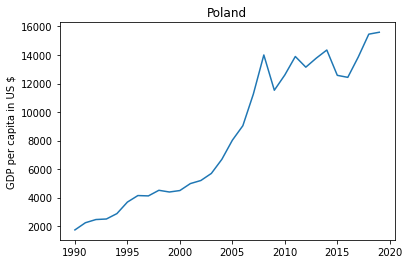

In [33]:
plt.plot(GDP.loc[GDP.country=='Poland','year'],GDP.loc[GDP.country=='Poland','GDP_per_capita'])
plt.title('Poland')
plt.ylabel('GDP per capita in US $')
plt.show()

<p style="font-size:1.2em;color:black;text-align:justify;line-height:1.8;"> Preparation of data for GDP for Poland </p>

In [34]:
# setting the look_back variable
look_back=3
data_GDP=lstm_data_prepare(data=GDP,country_name='Poland',look_back=look_back,scaler_ind=1,variable='GDP_per_capita')

<p style="font-size:1.2em;color:black;text-align:justify;line-height:1.8;"> Training of neural networks</p>

In [35]:
random.seed(30)
best_model_lstm_gdp=lstm_calibration(data_GDP[0],data_GDP[1],data_GDP[2],data_GDP[3],neurons=[10, 20],patience=30, min_epochs=20,regular=0)

<p style="font-size:1.2em;color:black;text-align:justify;line-height:1.8;"> Retraining the network on the whole dataset with the given number of epochs and neurons</p>

In [36]:
random.seed(30)
best_model_calib_GDP=final_lstm(data_GDP[4],data_GDP[5],best_model_lstm_gdp[0],best_model_lstm_gdp[1],best_model_lstm_gdp[2])

<p style="font-size:1.2em;color:black;text-align:justify;line-height:1.8;"> Making prediction of GDP: adding GDP estimations for years 1983-1989 to the data frame with all data</p>

In [37]:
wyniki_gdp=predictions_lstm(data_GDP[6],best_model_calib_GDP,'Poland',scaler=data_GDP[7],look_back=look_back,year=1990)
raw_data2.loc[(raw_data2.country=='Poland') & (raw_data2.year<1990),'GDP_per_capita']=np.flip(wyniki_gdp)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


<p style="font-size:1.2em;color:black;text-align:justify;line-height:1.8;">  Plot with extended history</p>

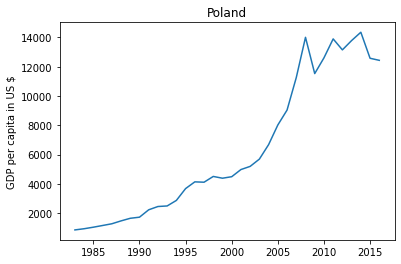

In [38]:
plt.plot(raw_data2.loc[raw_data2.country=='Poland','year'],raw_data2.loc[raw_data2.country=='Poland','GDP_per_capita'])
plt.title('Poland')
plt.ylabel('GDP per capita in US $')
plt.show()

<p style="font-size:2em;color:black;text-align:justify;line-height:1.8;">  The end of data preparation</p>

<p style="font-size:1.2em;color:black;text-align:justify;line-height:1.8;">  All the required data is prepared for the actual suicide rate estimations. The time series have been extended backward and the missing single data points have been interpolated. The actual suicide rate estimated with linear models.</p>

In [39]:
raw_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110 entries, 0 to 156
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    110 non-null    int64  
 1   country                 110 non-null    object 
 2   suicide_rate            105 non-null    float64
 3   HDI                     110 non-null    float64
 4   unemployment_rate       110 non-null    float64
 5   estimated_suicide_rate  110 non-null    float64
 6   GDP_per_capita          110 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 11.9+ KB


<p style="font-size:1.2em;color:black;text-align:justify;line-height:1.8;">   Dropping suicide_rate from the data frame (we use estimated suicide rate)</p>

In [40]:
final_data=raw_data2.drop(['suicide_rate'],axis=1)

In [41]:
final_data.head()

,year,country,HDI,unemployment_rate,estimated_suicide_rate,GDP_per_capita
0,1979,Australia,0.834806,12.900329,13.464869,9281.523356
1,1980,Australia,0.835970,12.818982,13.096501,10194.318700
2,1981,Australia,0.837320,12.721080,13.201749,11833.743210
3,1982,Australia,0.838872,12.602746,13.306997,12766.522250
4,1983,Australia,0.840604,12.461461,12.991254,11518.668520


<p style="font-size:1.2em;color:black;text-align:justify;line-height:1.8;">   Plots of estimated suicide rate for each country</p>

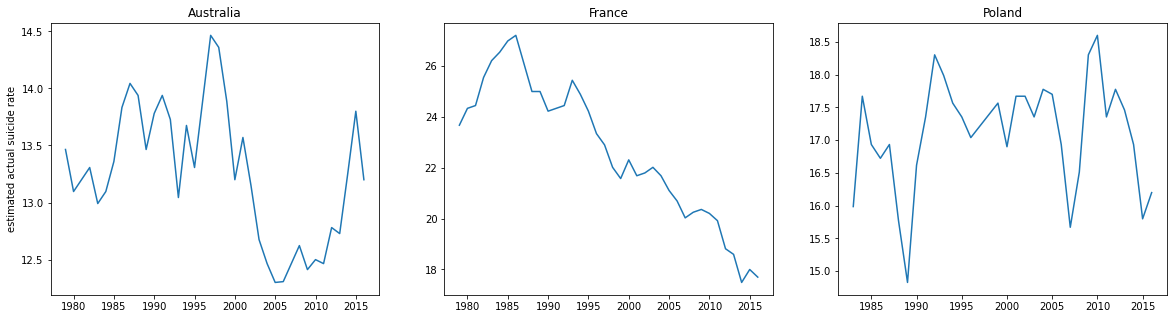

In [42]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
countries=final_data.country.unique()

for i in range(0,len(countries)):
    ax[i].plot(final_data.loc[final_data.country==countries[i],'year'],final_data.loc[final_data.country==countries[i],'estimated_suicide_rate'])
    ax[i].set_title(countries[i])
ax[0].set_ylabel('estimated actual suicide rate')
plt.show()

<p style="font-size:1.2em;color:black;text-align:justify;line-height:1.8;">Creating separate dataframe for each country with shifted estimated suicide rate. In case of models for suicide rate we take delays from the previous and two previous periods</p>

In [43]:
countries=final_data.country.unique()
frames=[]
for i in range(0,len(countries)):
    data_t=final_data[final_data.country==countries[i]]
    frames.append(pd.concat([data_t, data_t.estimated_suicide_rate.rename('suicide_rate_s1').shift(),data_t.estimated_suicide_rate.rename('suicide_rate_s2').shift(2)], axis=1))

<p style="font-size:1.2em;color:black;text-align:justify;line-height:1.8;">Function: preparation of the data frame for the LSTM neural networks. For the actual suicide rate prediction models the dataset is split in proportions 80% for train and 20% for test<p>

In [44]:
def lstm_final_prepare(data=frames[0],aux_var=['HDI','unemployment_rate','GDP_per_capita','suicide_rate_s1','suicide_rate_s2'],explain='estimated_suicide_rate',scaler_ind=1,split=0.8):
   
    var_list=aux_var.copy()
    var_list.append(explain)
    
    dataset=data.loc[:,var_list].dropna().reset_index(drop=True)
    
    # dividing dataset into train test, accordingly to parameter split
    train_size = int(len(dataset) * split)
    test_size = len(dataset) - train_size
    
    train = dataset[0:train_size].reset_index(drop=True)
    test = dataset[train_size:len(dataset)].reset_index(drop=True)
    
    # scaler
    
    # two scalers considered: first for training the network (with train test split) and the second for application of the whole dataset and making actual predictions
    if scaler_ind==1:
        scaler=MinMaxScaler(feature_range=(0, 1))
        scaler2=MinMaxScaler(feature_range=(0, 1))
      
    
        train[var_list]=scaler.fit_transform(train[var_list])
        test[var_list]=scaler.transform(test[var_list])
    
        dataset[var_list]=scaler2.fit_transform(dataset[var_list])

    else:
        scaler1='no_scaler'
        scaler2='no_scaler'
    
    # dividing into explained and explanatory variables
    trainX=np.array(train.loc[:,aux_var].astype('float32'))
    trainY=np.array(train.loc[:,explain].astype('float32'))
    
    testX=np.array(test.loc[:,aux_var].astype('float32'))
    testY=np.array(test.loc[:,explain].astype('float32'))  
    
    all_x=np.array(dataset.loc[:,aux_var].astype('float32'))
    all_y=np.array(dataset.loc[:,explain].astype('float32'))    

    #reshape input to be [samples, features, time steps] because of LSTM input
    
    trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    all_x=np.reshape(all_x, (all_x.shape[0], 1, all_x.shape[1]))
    
    return [trainX, trainY, testX, testY, all_x, all_y, dataset, scaler, scaler2]

<p style="font-size:1.2em;color:black;text-align:justify;line-height:1.8;">Creation of data for each country in a loop: output is list of different slices of data</p>

In [45]:
countries=final_data.country.unique()

data_list_final=[]
for i in range(0,len(countries)):   
    data=lstm_final_prepare(data=frames[i])
    data_list_final.append(data) 

<p style="font-size:2em;color:black;text-align:justify;line-height:1.8;">Function: LSTM first architecture - vanilla LSTM with one LSTM layer</p>

In [46]:
def lstm_calibration_final1(trainX,trainY,testX,testY,neurons=[15, 30],epochs_number=3000,patience=300,min_epochs=200, regular=0,activations=['tanh']):
    # the parameters available to train are: the number of neurons in LSTM layer and the activation function
    # the rest of parameters arbitraly set up (i.e. kernel initializer from uniform to normal, modified distribution)
    
    results = []
    n_epochs=[]
    n_type=[]
    l2_type=[]
    active=[]
    models=[]
    
    for neuron in neurons:
        for activation in activations:
            model = Sequential()
            model.add(LSTM(neuron, activation=activation,kernel_initializer='glorot_normal',kernel_regularizer=L1L2(l2=regular),input_shape=(1, trainX.shape[2])))
            model.add(Dense(1))
            # adam aptimizer chosen: observed better results (faster convergence) in comparison to other optimizers (rmsprop, adgrad, addadelta)
            model.compile(loss='mean_squared_error', optimizer='adam')
            r=model.fit(trainX, trainY, epochs=epochs_number, batch_size=1, verbose=0,validation_data=(testX, testY),shuffle=False,\
                  callbacks=[EarlyStopping(monitor='val_loss', verbose=0, patience=patience, restore_best_weights=True)])
            results.append(min(r.history['val_loss']))
            
            if len(r.history['loss'])==epochs_number:
                n_epochs.append(len(r.history['loss']))
                
            # if the number of epochs is very low (despite high patience), the minimum number of epochs for training is set to min_epochs number (to avoid underfitting)
            elif len(r.history['loss'])<min_epochs+patience:
                n_epochs.append(min_epochs)
            else:
                n_epochs.append(len(r.history['loss'])-patience)
                
            n_type.append(neuron)
            l2_type.append(regular)
            active.append(activation)
            models.append(model)
            
    # function returns: optimal number of neurons in LSTM layer, optimal number of epochs for appropriate model, chosen L2 reglarization parameter, activation function, 
    # val_loss and the best trained model (with weights restored from the best epoch)
    return [n_type[np.argmin(results)], n_epochs[np.argmin(results)], l2_type[np.argmin(results)],active[np.argmin(results)],np.min(results),models[np.argmin(results)]]

<p style="font-size:1.2em;color:black;text-align:justify;line-height:1.8;"> Training of neural networks</p>

In [47]:
countries=final_data.country.unique()
best_models_final1=[]
random.seed(30)
for i in range(0,len(countries)):
    model_lstm_final1=lstm_calibration_final1(data_list_final[i][0],data_list_final[i][1], data_list_final[i][2], data_list_final[i][3],neurons=[20,40], patience=200, min_epochs=20,\
                             activations=['tanh','selu','relu'],regular=0)
    best_models_final1.append(model_lstm_final1)

<p style="font-size:1.2em;color:black;text-align:justify;line-height:1.8;">Plots: The real dataset as well as predicted data from train and test datasets. Additionally the RMSE for validation data set is computed (due to regularization, the actual RMSE has to be computed manually) </p>

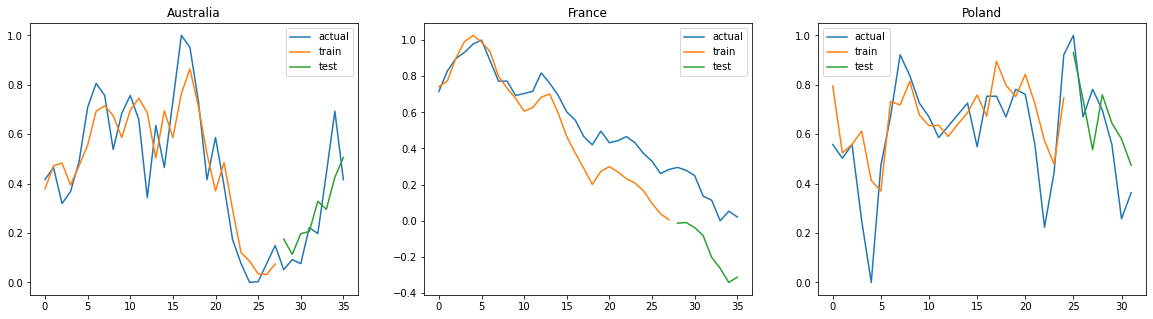

In [48]:
countries=final_data.country.unique()
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
val_rmse1=[]

# Visualisation of models
for i in range(0,len(countries)):
    # make predictions
    trainPredict = best_models_final1[i][5].predict(data_list_final[i][0])
    testPredict = best_models_final1[i][5].predict(data_list_final[i][2])
    
    #computation of rmse for validation data set for best trained model with first LSTM architecture
    rmse=(np.sum((data_list_final[i][3]-testPredict)**2)/len(testPredict))**0.5
    val_rmse1.append(rmse)
    
    # shift train predictions for plotting
    trainPredictPlot = pd.DataFrame([np.nan] * len(data_list_final[i][5]))
    trainPredictPlot.loc[:len(trainPredict)-1]=trainPredict

    # shift test predictions for plotting
    testPredictPlot =pd.DataFrame([np.nan] * len(data_list_final[i][5]))
    testPredictPlot.loc[len(trainPredict):]=testPredict

    # plot baseline and predictions
    ax[i].plot(data_list_final[i][5],label='actual')
    ax[i].plot(trainPredictPlot, label='train')
    ax[i].plot(testPredictPlot, label='test')
    ax[i].set_title(countries[i])
    ax[i].legend()

plt.show()

<p style="font-size:1.2em;color:black;text-align:justify;line-height:1.8;">Function: retraining the best networks for each country on the whole dataset with the given number of epochs and neurons</p>

In [49]:
 def final1_lstm_calib(all_x,all_y, neurons, epochs, reg, activation):    
    model = Sequential()
    model.add(LSTM(neurons, activation=activation, kernel_regularizer=L1L2(l2=reg), input_shape=(1, all_x.shape[2])))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(all_x, all_y, epochs=epochs, batch_size=1, verbose=0,shuffle=False)
    return model

<p style="font-size:1.2em;color:black;text-align:justify;line-height:1.8;"> Retraining LSTM vanilla architecture on the whole datasets for each country </p>

In [50]:
# list of estimated LSTM models for each country
countries=final_data.country.unique()
random.seed(30)
best_model_calibration_1=[]
for i in range(0,len(countries)):
    best_model_calib=final1_lstm_calib(data_list_final[i][4],data_list_final[i][5],best_models_final1[i][0],best_models_final1[i][1],best_models_final1[i][2],best_models_final1[i][3])
    best_model_calibration_1.append(best_model_calib)

<p style="font-size:2em;color:black;text-align:justify;line-height:1.8;"> Note: why it is chosen to consider each country separately during the modelling process?</p>
<p style="font-size:1.2em;color:black;text-align:justify;line-height:1.8;"> The suicide rate is modelled separately because of the assumed behaviour of the data. The author assumes that the actual suicide rates in each country may be dependent on the specific conditions of each country i.e. for one country unemployment rate equal to 20% may be very impactfull on the actual suicide rate increase, but in other country the variable may has no effect on the suicide rate i.e. because the average historical unemployment rates are quite high, the ipact is low. The LSTM models could be potentially trained on multiple time-series, however in authors opinion it would require additional explanation based on the comparison of the countries in terms of individual variables considered during modelling process. When each country is modelled separately, the effect of the country (each specific condition specific to a given country) is basically set to constant (i.e. long-term social anxiety conneced to the internal situation that may potentially have impact on he suicide rates). Nevertheless the consideration of training one LSTM on multiple time series for comparison purposes is potentially interesting extension of the project.</p>

<p style="font-size:2em;color:black;text-align:justify;line-height:1.8;">Function: LSTM second architecture - stacked LSTM with two layers </p>

In [51]:
def lstm_calibration_final2(trainX,trainY,testX,testY,neurons=[15, 30],epochs_number=3000,patience=300,min_epochs=200, regular=0,activations=['tanh']):
    results = []
    n_epochs=[]
    n_type=[]
    l2_type=[]
    active=[]
    models=[]
    
    for neuron in neurons:
        for activation in activations:
            model = Sequential()
            model.add(LSTM(neuron, activation=activation,kernel_initializer='glorot_normal',return_sequences=True,kernel_regularizer=L1L2(l2=regular),input_shape=(1, trainX.shape[2])))
            model.add(LSTM(neuron, activation=activation))
            model.add(Dense(1))
            
            # adam aptimizer chosen: observed better results (faster convergence) in comparison to other optimizers (rmsprop, adgrad, addadelta)
            model.compile(loss='mean_squared_error', optimizer='adam')
            r=model.fit(trainX, trainY, epochs=epochs_number, batch_size=1, verbose=0,validation_data=(testX, testY),shuffle=False,\
                  callbacks=[EarlyStopping(monitor='val_loss', verbose=0, patience=patience, restore_best_weights=True)])
            results.append(min(r.history['val_loss']))
            
            if len(r.history['loss'])==epochs_number:
                n_epochs.append(len(r.history['loss']))
                
            # if the number of epochs is very low (despite high patience), the minimum number of epochs for training is set to min epochs number (to avoid underfitting)
            elif len(r.history['loss'])<min_epochs+patience:
                n_epochs.append(min_epochs)
            else:
                n_epochs.append(len(r.history['loss'])-patience)
                
            n_type.append(neuron)
            l2_type.append(regular)
            active.append(activation)
            models.append(model)
            
    # function returns: optimal number of neurons in LSTM layer, optimal number of epochs for appropriate model, chosen L2 reglarization parameter, activation function, 
    # val_loss and the best trained model (with weights restored from the best epoch)
    return [n_type[np.argmin(results)], n_epochs[np.argmin(results)], l2_type[np.argmin(results)],active[np.argmin(results)],np.min(results),models[np.argmin(results)]]

<p style="font-size:1.2em;color:black;text-align:justify;line-height:1.8;"> Training of neural networks</p>

In [52]:
countries=final_data.country.unique()
best_models_final2=[]
random.seed(30)
for i in range(0,len(countries)):
    model_lstm_final2=lstm_calibration_final2(data_list_final[i][0],data_list_final[i][1], data_list_final[i][2], data_list_final[i][3],neurons=[20,40], patience=100, min_epochs=20,\
                             activations=['tanh','selu','relu'],regular=0.01)
    best_models_final2.append(model_lstm_final2)

<p style="font-size:1.2em;color:black;text-align:justify;line-height:1.8;">Plots: The real dataset as well as predicted data from train and test datasets. Additionally the RMSE for validation data set is computed (due to regularization, the actual RMSE has to be computed manually) </p>

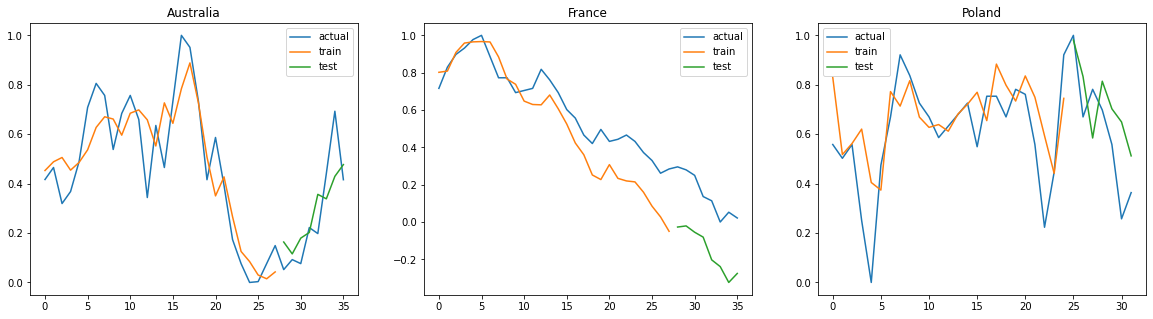

In [53]:
countries=final_data.country.unique()
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
val_rmse2=[]

# Visualisation of models
for i in range(0,len(countries)):
    # make predictions
    trainPredict = best_models_final2[i][5].predict(data_list_final[i][0])
    testPredict = best_models_final2[i][5].predict(data_list_final[i][2])

    rmse=(np.sum((data_list_final[i][3]-testPredict)**2)/len(testPredict))**0.5
    val_rmse2.append(rmse)
    
    # shift train predictions for plotting
    trainPredictPlot = pd.DataFrame([np.nan] * len(data_list_final[i][5]))
    trainPredictPlot.loc[:len(trainPredict)-1]=trainPredict

    # shift test predictions for plotting
    testPredictPlot =pd.DataFrame([np.nan] * len(data_list_final[i][5]))
    testPredictPlot.loc[len(trainPredict):]=testPredict

    # plot baseline and predictions
    ax[i].plot(data_list_final[i][5],label='actual')
    ax[i].plot(trainPredictPlot,label='train')
    ax[i].plot(testPredictPlot,label='test')
    ax[i].set_title(countries[i])
    ax[i].legend()
plt.show()

<p style="font-size:1.2em;color:black;text-align:justify;line-height:1.8;">Function: retraining the best networks for each country on the whole dataset with the given number of epochs and neurons</p>

In [54]:
 def final2_lstm_calib(all_x,all_y, neurons, epochs, reg, activation):    
    model = Sequential()
    model.add(LSTM(neurons, activation=activation,return_sequences=True, kernel_regularizer=L1L2(l2=reg),kernel_initializer='glorot_normal', input_shape=(1, all_x.shape[2])))
    model.add(LSTM(neurons, activation=activation))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(all_x, all_y, epochs=epochs, batch_size=1, verbose=0,shuffle=False)
    return model

<p style="font-size:1.2em;color:black;text-align:justify;line-height:1.8;"> Retraining LSTM stacked architecture on the whole datasets for each country </p>

In [55]:
# list of estimated LSTM models for each country
countries=final_data.country.unique()
random.seed(30)
best_model_calibration_2=[]

for i in range(0,len(countries)):
    best_model_calib=final2_lstm_calib(data_list_final[i][4],data_list_final[i][5],best_models_final2[i][0],best_models_final2[i][1],best_models_final2[i][2],best_models_final2[i][3])
    best_model_calibration_2.append(best_model_calib)

<p style="font-size:2em;color:black;text-align:justify;line-height:1.8;">Function: LSTM third architecture - bidirectional LSTM with two layers</p>

In [56]:
def lstm_calibration_final3(trainX,trainY,testX,testY,neurons=[15, 30],epochs_number=3000,patience=300,min_epochs=200, regular=0,activations=['tanh']):
    results = []
    n_epochs=[]
    n_type=[]
    l2_type=[]
    active=[]
    models=[]
    
    for neuron in neurons:
        for activation in activations:
            model = Sequential()
            model.add(Bidirectional(LSTM(neuron, activation=activation,return_sequences=True,kernel_initializer='lecun_normal',kernel_regularizer=L1L2(l2=regular),\
                                         input_shape=(1, trainX.shape[2]))))
            model.add(Bidirectional(LSTM(neuron, activation=activation)))
            model.add(Dense(1))
            
            # adam aptimizer chosen: observed better results (faster convergence) in comparison to other optimizers (rmsprop, adgrad, addadelta)
            model.compile(loss='mean_squared_error', optimizer='adam')
            r=model.fit(trainX, trainY, epochs=epochs_number, batch_size=1, verbose=0,validation_data=(testX, testY),shuffle=False,\
                  callbacks=[EarlyStopping(monitor='val_loss', verbose=0, patience=patience, restore_best_weights=True)])
            results.append(min(r.history['val_loss']))
            
            if len(r.history['loss'])==epochs_number:
                n_epochs.append(len(r.history['loss']))
                
            # if the number of epochs is very low (despite high patience), the minimum number of epochs for training is set to min epochs number (to avoid underfitting)
            elif len(r.history['loss'])<min_epochs+patience:
                n_epochs.append(min_epochs)
            else:
                n_epochs.append(len(r.history['loss'])-patience)
                
            n_type.append(neuron)
            l2_type.append(regular)
            active.append(activation)
            models.append(model)
            
    # function returns: optimal number of neurons in LSTM layer, optimal number of epochs for appropriate model, chosen L2 reglarization parameter, activation function, 
    # val_loss and the best trained model (with weights restored from the best epoch)
    return [n_type[np.argmin(results)], n_epochs[np.argmin(results)], l2_type[np.argmin(results)],active[np.argmin(results)],np.min(results),models[np.argmin(results)]]

<p style="font-size:1.2em;color:black;text-align:justify;line-height:1.8;"> Training of neural networks</p>

In [57]:
countries=final_data.country.unique()
best_models_final3=[]
random.seed(30)
for i in range(0,len(countries)):
    model_lstm_final3=lstm_calibration_final3(data_list_final[i][0],data_list_final[i][1], data_list_final[i][2], data_list_final[i][3],neurons=[20,40], patience=200, min_epochs=20,\
                             activations=['tanh','selu'],regular=0.05)
    best_models_final3.append(model_lstm_final3)

<p style="font-size:1.2em;color:black;text-align:justify;line-height:1.8;">Plots: The real dataset as well as predicted data from train and test datasets. Additionally the RMSE for validation data set is computed (due to regularization, the actual RMSE has to be computed manually) </p>

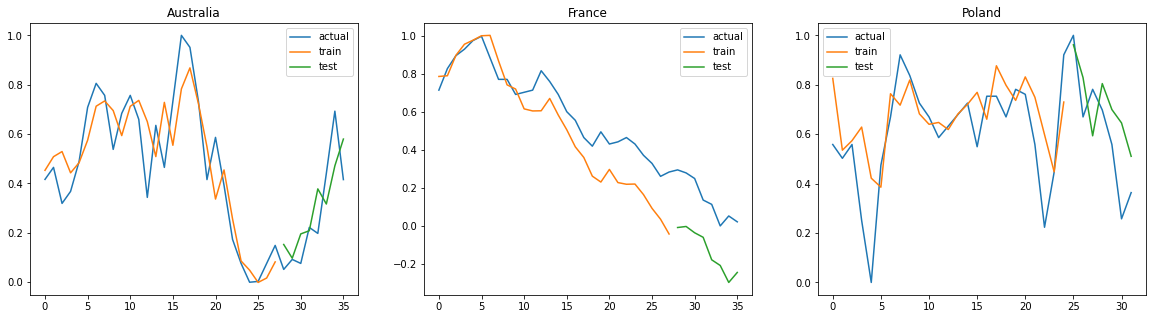

In [58]:
countries=final_data.country.unique()
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
val_rmse3=[]

# Visualisation of models
for i in range(0,len(countries)):
    # make predictions
    trainPredict = best_models_final3[i][5].predict(data_list_final[i][0])
    testPredict = best_models_final3[i][5].predict(data_list_final[i][2])
    
    rmse=(np.sum((data_list_final[i][3]-testPredict)**2)/len(testPredict))**0.5
    val_rmse3.append(rmse)
    
    # shift train predictions for plotting
    trainPredictPlot = pd.DataFrame([np.nan] * len(data_list_final[i][5]))
    trainPredictPlot.loc[:len(trainPredict)-1]=trainPredict

    # shift test predictions for plotting
    testPredictPlot =pd.DataFrame([np.nan] * len(data_list_final[i][5]))
    testPredictPlot.loc[len(trainPredict):]=testPredict

    # plot baseline and predictions
    ax[i].plot(data_list_final[i][5],label='actual')
    ax[i].plot(trainPredictPlot,label='train')
    ax[i].plot(testPredictPlot,label='test')
    ax[i].set_title(countries[i])
    ax[i].legend()
    #plt.plot(testPredictPlot)
plt.show()

<p style="font-size:1.2em;color:black;text-align:justify;line-height:1.8;">Function: retraining the best networks for each country on the whole dataset with the given number of epochs and neurons</p>

In [59]:
 def final3_lstm_calib(all_x,all_y, neurons, epochs, reg, activation):    
    model = Sequential()
    model.add(Bidirectional(LSTM(neurons, activation=activation,return_sequences=True,kernel_initializer='lecun_normal', kernel_regularizer=L1L2(l2=reg), input_shape=(1, all_x.shape[2]))))
    model.add(Bidirectional(LSTM(neurons, activation=activation)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(all_x, all_y, epochs=epochs, batch_size=1, verbose=0,shuffle=False)
    return model

<p style="font-size:1.2em;color:black;text-align:justify;line-height:1.8;"> Retraining LSTM stacked architecture on the whole datasets for each country </p>

In [60]:
# list of estimated LSTM models for each country
countries=final_data.country.unique()
random.seed(30)
best_model_calibration_3=[]
for i in range(0,len(countries)):
    best_model_calib=final3_lstm_calib(data_list_final[i][4],data_list_final[i][5],best_models_final3[i][0],best_models_final3[i][1],best_models_final3[i][2],best_models_final3[i][3])
    best_model_calibration_3.append(best_model_calib)

<p style="font-size:2em;color:black;text-align:justify;line-height:1.8;"> Predictions of suicide rates for years 2017 and 2018 with models trained on the whole available datasets</p>

<p style="font-size:1.2em;color:black;text-align:justify;line-height:1.8;"> Preparation of data frames based on raw data for the prediction purposes </p>

In [61]:
countries=final_data.country.unique()
frames_final=[]
for i in range(0,len(countries)):
    data_t=raw_data[raw_data.country==countries[i]]
    part1=pd.concat([data_t, data_t.estimated_suicide_rate.rename('suicide_rate_s1').shift(),data_t.estimated_suicide_rate.rename('suicide_rate_s2').shift(2)], axis=1)
    frames_final.append(part1[(part1.year==2017) | (part1.year==2018)])

<p style="font-size:1.2em;color:black;text-align:justify;line-height:1.8;">Preparation of the input for the actual suicide predictions for years 2017 and 2018: the scaler usage is assumed </p>

In [62]:
years_2017_2018=[]

for i in range(0,len(countries)):
    data1=np.array(frames_final[i].loc[frames_final[i].year==2017,['HDI','unemployment_rate','GDP_per_capita','suicide_rate_s1','suicide_rate_s2','estimated_suicide_rate']])
    data2=np.array(frames_final[i].loc[frames_final[i].year==2018,['HDI','unemployment_rate','GDP_per_capita','suicide_rate_s1','suicide_rate_s2','estimated_suicide_rate']])
    scaled=data_list_final[i][8].transform(data1)
    non_nan=scaled[0][0:5]
    reshaped=np.reshape(non_nan, (1, 1, 5))
    
    #prediction from LSTM first model
    
    #year 2017
    w11=best_model_calibration_1[i].predict(reshaped)
    data1[0][5]=w11
    w11_s=data_list_final[i][8].inverse_transform(data1)[0][5]
    data2[0][3]=w11_s
    
    #year 2018
    scaled2=data_list_final[i][8].transform(data2)
    non_nan2=scaled2[~np.isnan(scaled2)]
    reshaped2=np.reshape(non_nan2, (1, 1, 5))
    
    w12=best_model_calibration_1[i].predict(reshaped2)
    data2[0][5]=w12
    w12_s=data_list_final[i][8].inverse_transform(data2)[0][5] 
    
    #prediction from LSTM second model
    
    #year 2017
    w21=best_model_calibration_2[i].predict(reshaped)
    data1[0][5]=w21
    w21_s=data_list_final[i][8].inverse_transform(data1)[0][5]
    data2[0][3]=w21_s
    
    #year 2018
    scaled2=data_list_final[i][8].transform(data2)
    non_nan2=scaled2[0][0:5]
    reshaped2=np.reshape(non_nan2, (1, 1, 5))
    
    w22=best_model_calibration_2[i].predict(reshaped2)
    data2[0][5]=w22
    w22_s=data_list_final[i][8].inverse_transform(data2)[0][5]   
    
    #prediction from LSTM third model
    
    #year 2017
    w31=best_model_calibration_3[i].predict(reshaped)
    data1[0][5]=w31
    w31_s=data_list_final[i][8].inverse_transform(data1)[0][5]
    data2[0][3]=w31_s
    
    #year 2018
    scaled2=data_list_final[i][8].transform(data2)
    non_nan2=scaled2[0][0:5]
    reshaped2=np.reshape(non_nan2, (1, 1, 5))
    
    w32=best_model_calibration_3[i].predict(reshaped2)
    data2[0][5]=w32
    w32_s=data_list_final[i][8].inverse_transform(data2)[0][5]  

    
    years_2017_2018.append([[w11_s,w12_s],[w21_s,w22_s],[w31_s,w32_s]])

### Preparation of data for plots with trajectory of 3 different models

In [66]:
countries=final_data.country.unique()
predictions_2017_2018=[]
for i in range(0,len(countries)):

    actual_suicide=frames[i][['year','estimated_suicide_rate']]
    predictions=pd.DataFrame({'year':[2017,2018],'lstm1':years_2017_2018[i][0],'lstm2':years_2017_2018[i][1],'lstm3':years_2017_2018[i][2]})
    all_values=actual_suicide.append(predictions,ignore_index=True)
    predictions_2017_2018.append(all_values)

<p style="font-size:1.2em;color:black;text-align:justify;line-height:1.8;">Plots of the predictions of different LSTM architectures: the differences between models are associated to the modelled country</p>

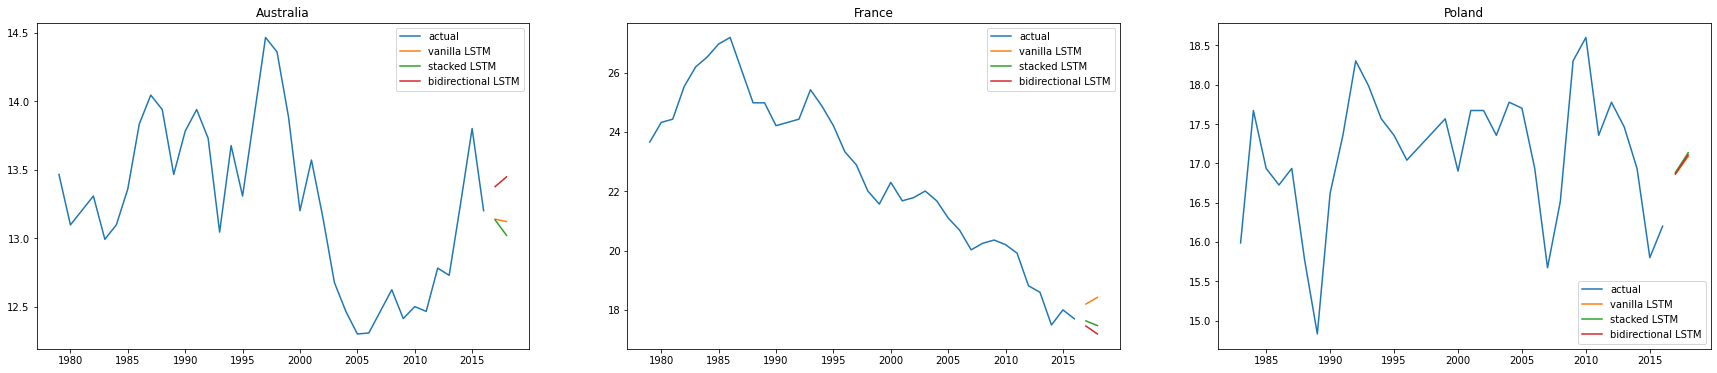

In [67]:
countries=final_data.country.unique()
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30,6))

# Visualisation of models
for i in range(0,len(countries)):

    # plot baseline and predictions
    ax[i].plot(predictions_2017_2018[i].loc[:,'year'],predictions_2017_2018[i]['estimated_suicide_rate'],label='actual')
    ax[i].plot(predictions_2017_2018[i].loc[:,'year'],predictions_2017_2018[i]['lstm1'],label='vanilla LSTM')
    ax[i].plot(predictions_2017_2018[i].loc[:,'year'],predictions_2017_2018[i]['lstm2'],label='stacked LSTM')
    ax[i].plot(predictions_2017_2018[i].loc[:,'year'],predictions_2017_2018[i]['lstm3'],label='bidirectional LSTM')
    
    ax[i].set_title(countries[i])
    ax[i].legend()

plt.show()

<p style="font-size:1.2em;color:black;text-align:justify;line-height:1.8;">Based on the above plots it can be concluded that the choice of model is very impacful on the actual predictions of the actual suicide rates</p>

<p style="font-size:1.2em;color:black;text-align:justify;line-height:1.8;"> The table with all the considered LSTM models for each country</p>

In [68]:
joined=best_models_final1+best_models_final2+best_models_final3
data_frame_summary=pd.DataFrame(joined,columns=['neurons in each layer','epochs number','L2 regularization parameter','activation function','val_loss','model'])
data_frame_summary['Country']=['Australia','France','Poland']*3
data_frame_summary['Model_type']=['vanilla LSTM']*3+['LSTM stacked']*3+['LSTM bidirectional']*3
data_frame_summary['LSTM layers number']=['1']*3+['2']*6
data_frame_summary['validation RMSE']=val_rmse1+val_rmse2+val_rmse3

data_frame_summary[['Model_type','Country','LSTM layers number','neurons in each layer','epochs number','L2 regularization parameter','activation function','validation RMSE']]\
.sort_values(by=['Country','validation RMSE']).reset_index(drop=True)

,Model_type,Country,LSTM layers number,neurons in each layer,epochs number,L2 regularization parameter,activation function,validation RMSE
0,vanilla LSTM,Australia,1,20,87,0.00,selu,0.692477
1,LSTM stacked,Australia,2,40,167,0.01,relu,0.693640
2,LSTM bidirectional,Australia,2,40,126,0.05,selu,0.745009
3,LSTM bidirectional,France,2,40,848,0.05,tanh,0.529795
4,LSTM stacked,France,2,40,306,0.01,relu,0.530549
5,vanilla LSTM,France,1,40,536,0.00,selu,0.558998
6,vanilla LSTM,Poland,1,20,93,0.00,tanh,0.770145
7,LSTM bidirectional,Poland,2,20,332,0.05,tanh,0.779963
8,LSTM stacked,Poland,2,20,357,0.01,tanh,0.790381


<p style="font-size:1.2em;color:black;text-align:justify;line-height:1.8;">  The prediction power of the model is associated with the RMSE computed for test data set (etimation made on network trained on training data set - not on the network retrained on the whole data set). The lower RMSE, the better the prediction power of the LSTM neural network.</p>

<p style="font-size:2em;color:black;text-align:justify;line-height:1.8;"> Data and information sources </p>
<p style="font-size:1.2em;color:black;text-align:justify;line-height:1.8;">
-https://www.who.int/data/gho/indicator-metadata-registry/imr-details/4664<br>
-https://www.who.int/mental_health/suicide-prevention/mortality_data_quality/en/<br>
-http://terrance.who.int/mediacentre/data/ghe/GlobalCOD_method_2000_2016.pdf?ua=1<br>
-https://apps.who.int/healthinfo/statistics/mortality/whodpms/<br>
-https://data.worldbank.org/</p>